# Estatística & Probabilidade - 2023/02

## Projeto 03 - Uma introdução ao aprendizado de máquina

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `oug6dox`

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é domingo 17/11/2023 às 23h59, prazo improrrogável. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, usando a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em "Atividades"
            
  - No tema "Projetos", clique em "Projeto 03" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 03".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada, caso não tenha sido gerada por você.

* O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito. Porém, vamos evitar problemas de "eu fiz tudo e ele/a não fez nada"! Infelizmente não tenho como controlar isso, e após o projeto entregue não adianta "eu fiz tudo sozinho/a", pois eu não estava lá para ver! Tentem se resolver entre si, mas em último caso posso auxiliar com uma mediação.

* No caso de trabalho em dupla, apenas **uma** pessoa da dupla deverá fazer o envio do trabalho, claro, deixando explícito quem é o/a parceiro/a.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada dupla (ou indivíduo) deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

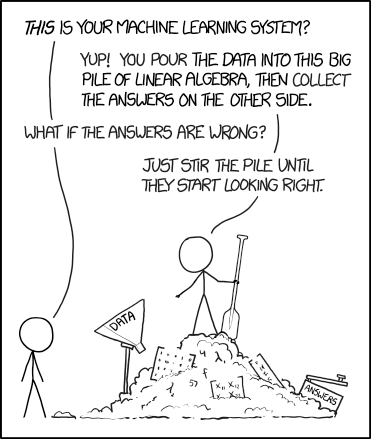

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})),$$ que vale $0$ se $Y = g(\mathbf{X})$ ou $1$ se $Y \neq g(\mathbf{X})$. Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X})).$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática - atributos contínuos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo
- Sendo $\mathbf{X}$ contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

#### Formulação matemática - atributos discretos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório discreto
- Sendo $\mathbf{X}$ discreto, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d)$$ $$= \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

### Classificador de Bayes ingênuo Bernoulli

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **discreto** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é discreto, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{Bern}(p_{dj})$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier


## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados. Vamos baixar a base e ver o DataFrame que a contém:

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(X.shape)
display(X)

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vejamos agora o vetor `y`, bem como o seu tamanho:

In [4]:
print(y.shape)
display(y)

(70000,)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

In [5]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0].reshape(28, 28)        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

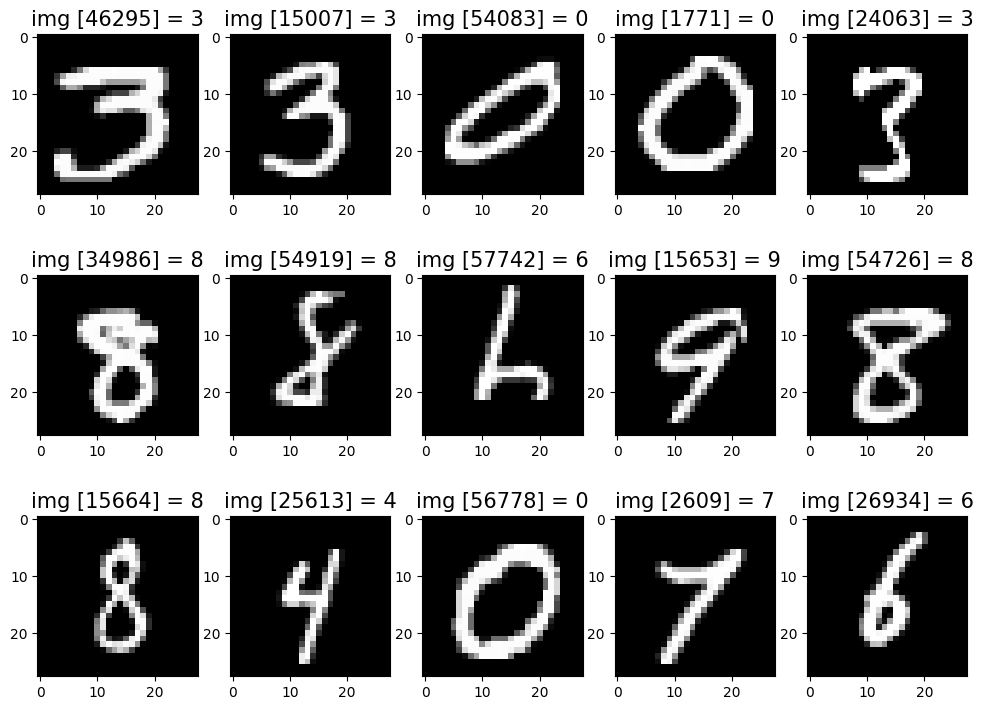

In [6]:
random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 7


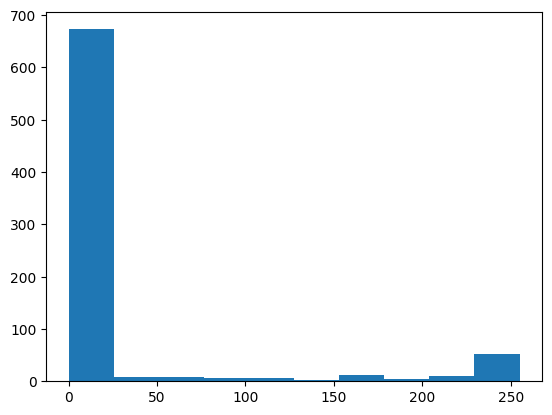

In [7]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando os classificadores de Bayes ingênuo gaussiano e Bernoulli que discutimos acima.

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

ATENÇÃO! Se você rodar a célula abaixo mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso!

In [8]:
X = X/255

**QUESTÃO 1:** Os classificadores de Bayes ingênuo gaussiano e Bernoulli têm duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos) ou Bernoulli (com parâmetro desconhecido). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

Abaixo segue um breve *spoiler* da análise exploratória.

Montando e exibindo a matriz de correlação dos *pixels*, condicionado em um dígito específico:

In [9]:
dig = 5
corr_dig = (X[y == str(dig)] + np.random.normal(loc = 0, scale = 0.001, size = X[y == str(dig)].shape)).corr() # Com maracutaia!
corr_dig[0, 0] = -1 # Com maracutaia!

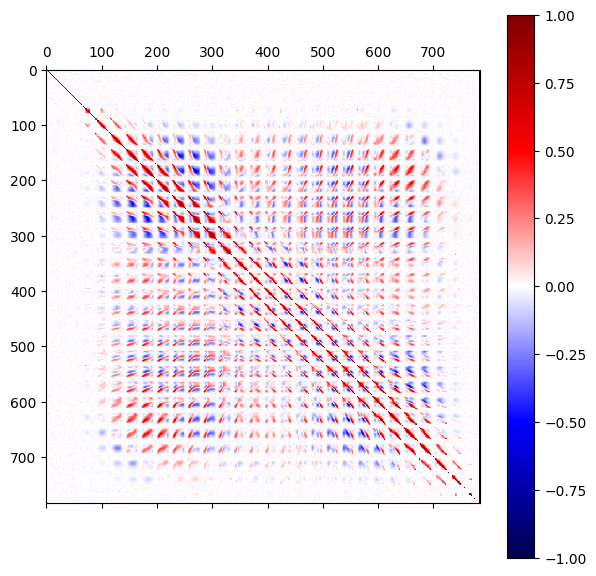

In [10]:
plt.figure(figsize = (7, 7))
plt.matshow(corr_dig, cmap = 'seismic', fignum = 1)
plt.colorbar()
plt.show()

Histograma de determinado *pixel*, condicionado em um dígito específico: 

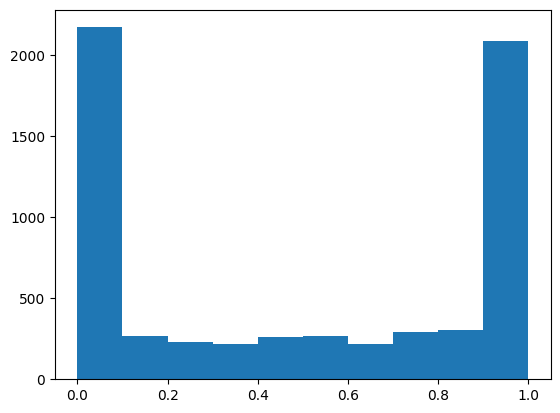

In [11]:
dig = 5
pixel = 350
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

--- Resposta ---

Ao analisarmos a natureza do problema em questão, podemos relacionar à classificação em classes com os "símbolos", isto é, os algarismos que desejamos classificar. Considerando cada um dos pixels da imagem como variáveis aleatórias, podemos analisá-las algoritmicamente de maneira independente com relação às cores que cada um destes pixels assume, as quais podem variar de 0 a 255, sendo 0 o preto e o 255 o preto (no caso do problema, optamos por normalizar os valores dividindo por 255, de modo que 0 permanece sendo preto enquanto o branco passa a assumir o valor 1) e assim determinando no final o resultado do símbolo por uma análise da visão geral, o que facilita o cálculo estatístico. Porém, ao se tratar da compreensão humana do que desejamos classificar, sabemos que não há de fato indepêndencia entre cada uma das partes que compõem uma imagem, já que a classifição dos algarismos é definida a partir da composição entre os pixels que seguem a característica visual de um desses símbolos. 

Em relação a como descrevemos cada uma dessas variáveis aleatórias (atributos, pixels da imagem), podemos modelar por distribuições normais com parâmetros desconhecidos e assim estimar $q(X = x | Y = d)$, que por mais que encontremos certa assertividade em certos pontos já que há uma probabilidade de um pixel ter colaração média (um cinza, que seria 128 ou 0,5), é possível verificar determinados casos que destoam bastante por serem pixels puramente pretos ou brancos, o que prejudica a análise dessas variáveis aleatórias com distribuição normal.

Além disso, podemos buscar também modelar através de distribuições de Bernoulli com parâmetro desconhecido, em que veremos uma concentração dos pontos em 0 e 1 (anteriormente as cores 0 e 255 do rgb), o que, novamente, por mais que alcance certa assertividade para números escritos com um traçado mais forte, isto é, que tem sua imagem variando de preto para branco e vice-versa repentinamente, ainda encontramos determinadas zonas cinzentas de pixels, as quais assumem valores intermediários entre 0 e 1 e, portanto, destoam da distribuição.

Podemos visualizar melhor essas questões por meio das análises abaixo:


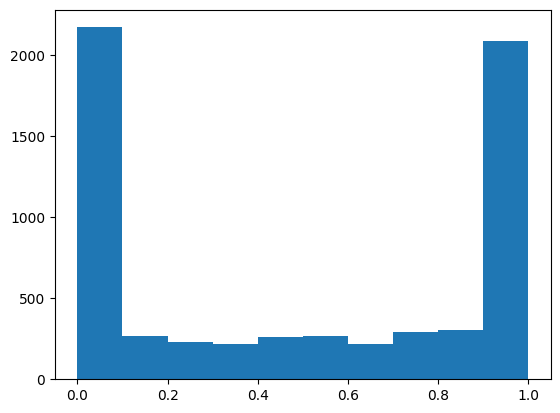

In [12]:
# Exemplo em que há certa discrepância na distribuição de Bernoulli 

dig = 5
pixel = 350
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

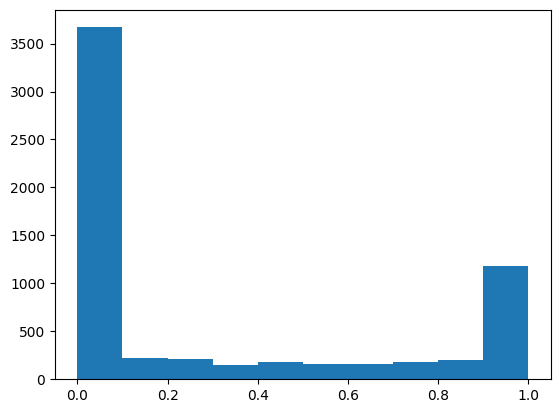

In [13]:
# Testando o dígito 5 novamente com outro pixel(270)

dig = 5
pixel = 270
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

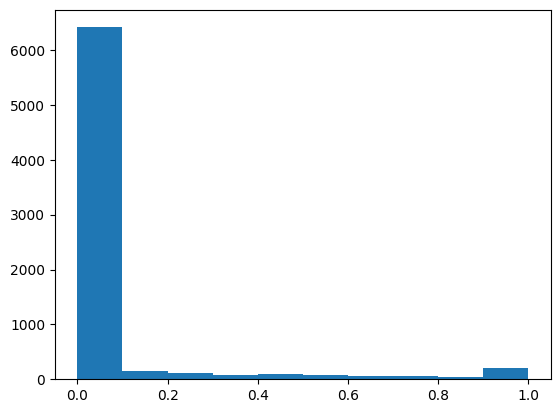

In [14]:
# Distribuição mais próxima da Bernoulli no digito 7 no pixel 350

dig = 7
pixel = 350
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

A partir da análise dos histogramas acima de um determinado pixel, relacionados a um dígito específico, podemos perceber que uma distribuição de Bernulli seria a melhor opção dentre as duas, já que a distribuição normal não se encaixa bem com a distribuição dos dados, como podemos ver no histograma do pixel 350, por exemplo. Podemos perceber que a distribuição de Bernulli também não se encaixa perfeitamente com os dados, uma vez que ainda há uma quantidade considerável de pontos intermediários, porém sua assertividade nos pontos 0 e 1 permanece considerável. Portanto, ambos os modelos possuem suas limitações, mas é possível visualizar que a distribuição de Bernulli se encaixa melhor com os dados propostos.

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** As classes que vamos usar para fazer o nosso procedimento são as `GaussianNB` e `BernoulliNB`, localizadas dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e ao `BernoulliNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), e as página direcionadas através do *link* "User Guide", onde encontram-se as formulações matemática por trás dos método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

--- Resposta ---

O **Gaussian NB** é um algoritmo de aprendizado de máquina que se baseia no Teorema de Bayes para realizar a classificação, partindo do princípio, de forma ingênua, de que há indepêndencia entre os atributos que compõem a classe, os quais seguem uma distribuição normal. Dessa forma, o modelo busca encontrar os parâmetros $\mu$ e $\sigma$ da distribuição normal por meio do método da máxima verossimilhança a fim de minimizar os erros em relação à distribuição dos dados, assumindo assim, que as variáveis aleatórias são contínuas.

Podemos realizar as comparações do modelo Gaussiano ingênuo de Bayes com o método de classificação contínuo proposto: 

- Ambos consideram a independência entre as variáveis aleatórias do problema (mesmo que, conforme discutido acima, essa "independência" seja uma simplificação do caso em questão).

- Ambos assumem que os atributos seguem distribuição normal.

- Outra semelhança é o fato de ambos os modelos buscarem classificar o $x_i$ com a classe que possui a maior probabilidade a posteriori pela estimativa do Máximo a Posteriori (MAP).

- Uma divergência entre os modelos é justamente o fato do *GaussianNB* buscar encontrar os parâmetros $\mu$ e $\sigma$ para então formar uma curva normal que minimiza o erro.

A fórmula matemática que descreve o método ingênuo Gaussiano é dada por:
$$
\mathrm{\displaystyle { P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)}}
$$ 

Quanto ao **BernoulliNB**, é um algoritmo classificador voltado para dados discretos que também se baseia no Teoream de Bayes e que, logo, também é implementado de forma ingênua, isto é, considera a independência entre os atributos, os quais que seguem a distribuição de Bernoulli. Dessa forma, o modelo se baseia na distribuição das amostras de forma binária (valores booleanos), de modo que quaisquer outros tipos de dados podem ser binarizados dependendo do parâmetro `binarize`. Este algoritmo, portanto, assume que as variáveis aleatórias da classe são discretas.

Podemos realizar as comparações entre o modelo de Bernoulli com o método de classificação discreto proposto: 

- Ambos consideram a independência entre as variáveis aleatórias do problema (mesmo que, conforme discutido acima, essa "independência" seja uma simplificação do caso em questão).

- Ambos assumem que os atributos seguem distribuição de Bernoulli.

- Uma divergência entre os modelos é justamente o fato do *BernoulliNB* buscar binarizar os dados de entrada, o que depende do limite para binarização definido pelo parâmetro `binarize`, o que tem como finalidade minimizar os erros de dados que não consistem em vetores binários.

A fórmula matemática que descreve o modelo ingênuo de Bernoulli é dada por: 
$$
\mathrm{\displaystyle {P(x_i \mid y) = P(x_i = 1 \mid y) x_i + (1 - P(x_i = 1 \mid y)) (1 - x_i)}}
$$

Em relação aos métodos `fit`, `predict` e `predict_proba`, podemos descrevê-los da seguinte forma: 

- `fit`: realiza o ajuste dos classificadores ao determinar os parâmetros necessários para cada um dos modelos (os parâmetros $\mu$ e $\sigma$ no caso do *GaussianNB* e das entradas de cada atributo no caso do *BernoulliNB*), o que se dá por meio do uso de vetores de treinamento X que são rodados de acordo com o número de amostras até que sejam determinados "vetores alvo" Y.

- `predict`: realiza a classificação desses vetores de treinamento X, que categorizam os dados de entrada com base nos "vetores alvo" C, os quais neste caso são valores previstos para os vetores anteriormente definidos como treinamento.

- `predict_proba`: retorna as probabilidades de uma dada amostra de entrada X ser de um determinada classe, que são retornadas a partir de uma matriz C de probabilidades para cada classe do modelo.  

**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` e o `BernoulliNB` para treinar os modelos de Bayes ingênuo gaussiano e Bernoulli nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

--- Resposta ---

In [16]:
# Gaussian Naive Bayes

gnb = GaussianNB() # Instancia o modelo
gnb.fit(X_train, y_train) # Treina o modelo
gauss_pred = gnb.predict(X_test) # Faz predições
gauss_predict_proba = gnb.predict_proba(X_test) # Probabilidades preditas

print('Acurácia:', gnb.score(X_test, y_test))
print('Quantidade de acertos:', np.sum(gauss_pred == y_test))
print('Quantidade de erros:', np.sum(gauss_pred != y_test))

Acurácia: 0.5568
Quantidade de acertos: 5568
Quantidade de erros: 4432


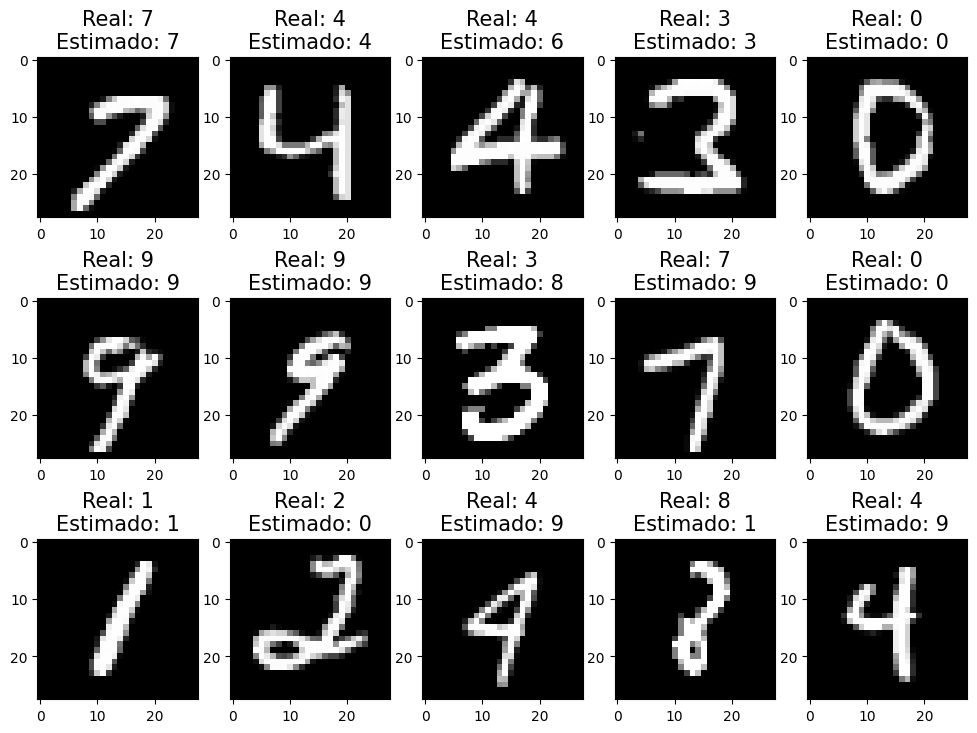

In [17]:
random_images = []
for i in range(0, 15):
    r = random.choice(X_test.index)
    random_images.append((X_test.loc[r].values, 'Real: ' + str(y[r] + '\nEstimado: ' + str(gauss_pred[X_test.index.get_loc(r)]))))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

In [18]:
# Bernoulli Naive Bayes

bnb = BernoulliNB() # Instancia o modelo
bnb.fit(X_train, y_train) # Treina o modelo
bernoulli_pred = bnb.predict(X_test) # Faz predições
bernoulli_predict_proba = bnb.predict_proba(X_test) # Probabilidades preditas

print('Acurácia:', bnb.score(X_test, y_test))
print('Quantidade de acertos:', np.sum(bernoulli_pred == y_test))
print('Quantidade de erros:', np.sum(bernoulli_pred != y_test))

Acurácia: 0.8257
Quantidade de acertos: 8257
Quantidade de erros: 1743


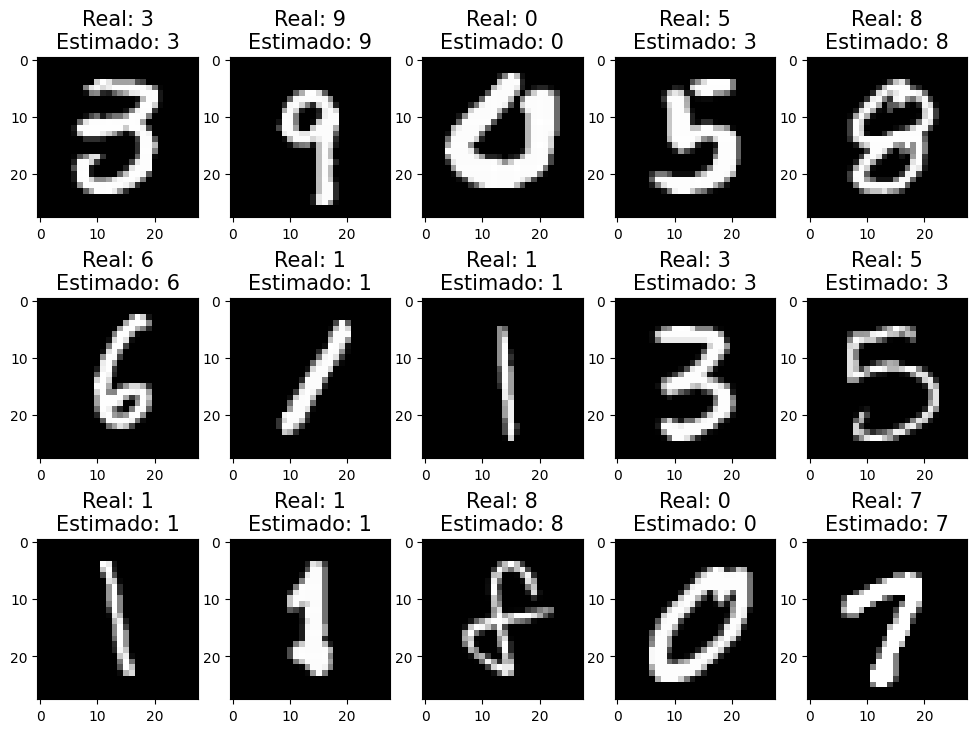

In [19]:
random_images = []
for i in range(0, 15):
    r = random.choice(X_test.index)
    random_images.append((X_test.loc[r].values, 'Real: ' + str(y[r] + '\nEstimado: ' + str(bernoulli_pred[X_test.index.get_loc(r)]))))
show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? E para o classificador de Bayes ingênuo Bernoulli? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

--- Resposta ---

Para calcular quantos parâmetros são necessários na estimativa desses classificadores, devemos levar em consideração os seguinte fatores: o número de classes (dígitos de algarismos que podem ser escritos), número de atributos (pixels da imagem) e o número de parâmetros referentes a cada uma das distribuições.

Sendo assim, sabendo que o número de dígitos considerados no problema é $10$ (algarismos 0, 1, 2, ... 9) e que o total de pixels da imagem é dado por $28 \times 28 = 784$, podemos encontrar o número de parâmetros estimados para o ajuste dos modelos da seguinte forma:

$$
\text{N}^\circ \text{ de parâmetros de ajuste} = \text{N}^\circ \text{ de classes} \times \text{N}^\circ \text{ de atributos} \times \text{N}^\circ \text{ de parâmetros da distribuição}
$$

Calculando o número de parâmetros de ajuste para o modelo de Bayes ingênuo Gaussiano, considerando que os atributos seguem a distribuição normal e que, portanto, possuem 2 parâmetros $\mu$ e $\sigma$ da distribuição:

$$
\text{N}^\circ \text{ de parâmetros de ajuste Gaussiano} = 10 \times 784 \times 2 = 15680 \text{ parâmetros}
$$

Calculando o número de parâmetros de ajuste para o modelo de Bayes ingênuo de Bernoulli, considerando que os atributos seguem a distribuição de Bernoulli e que, portanto, possuem 1 parâmetro $p$ da distribuição:

$$
\text{N}^\circ \text{ de parâmetros de ajuste de Bernoulli} = 10 \times 784 \times 1 = 7840 \text{ parâmetros}
$$

Assim, vemos que os parâmetros necessários para o modelo Gaussiano são o dobro do necessário para o modelo de Bernoulli, o que evidencia a maior acurácia observada neste último modelo. No entanto, quando comparamos com o conjunto de dados de teste, que equivale a $60000$ observações, concluímos que seria conveniente haver um maior conjunto desses dados haja vista que a qualidade da análise pode ser prejudicada considerando as ferramentas fornecidas pela Estatística Clássica, tais como a Lei dos Grandes Números e o Teorema Central do Limite, que são muito limitadas diante de um número pequeno de observações.     

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

--- Resposta --- 

In [20]:
# Calculando acurácia usando matriz de confusão para o modelo Gaussiano

cm_gauss = confusion_matrix(y_test, gauss_pred)

acertos_totais = 0
for i in range(len(cm_gauss)):
    sum = np.sum(cm_gauss[i])
    acerto_classe = cm_gauss[i][i]
    print('Classe', i, ':', acerto_classe/sum) # Acurácia por classe
    acertos_totais += acerto_classe
print('\nAcurácia total:', acertos_totais/len(y_test)) # Acurácia total


Classe 0 : 0.8935091277890467
Classe 1 : 0.9448888888888889
Classe 2 : 0.3163163163163163
Classe 3 : 0.3411764705882353
Classe 4 : 0.13230769230769232
Classe 5 : 0.057649667405764965
Classe 6 : 0.9175152749490835
Classe 7 : 0.31285988483685223
Classe 8 : 0.637948717948718
Classe 9 : 0.9356136820925554

Acurácia total: 0.5568


In [21]:
# Calculando acurácia usando matriz de confusão para o modelo Bernoulli

cm_bernoulli = confusion_matrix(y_test, bernoulli_pred)

acertos_totais = 0
for i in range(len(cm_bernoulli)):
    sum = np.sum(cm_bernoulli[i])
    acerto_classe = cm_bernoulli[i][i]
    print('Classe', i, ':', acerto_classe/sum) # Acurácia por classe
    acertos_totais += acerto_classe
print('\nAcurácia total:', acertos_totais/len(y_test)) # Acurácia total

Classe 0 : 0.8904665314401623
Classe 1 : 0.9528888888888889
Classe 2 : 0.8058058058058059
Classe 3 : 0.8127450980392157
Classe 4 : 0.796923076923077
Classe 5 : 0.7017738359201774
Classe 6 : 0.879837067209776
Classe 7 : 0.8378119001919386
Classe 8 : 0.7589743589743589
Classe 9 : 0.7907444668008048

Acurácia total: 0.8257


In [22]:
# Calculando score usando o conjunto de treinamento, o que não é recomendado:

print('Score do modelo Gaussiano com conjunto de Treino:', gnb.score(X_train, y_train))
print('Score do modelo Bernoulli com conjunto de Treino:', bnb.score(X_train, y_train))

# Calculando score usando o conjunto de teste:

print('\nScore do modelo Gaussiano com conjunto de Teste:', gnb.score(X_test, y_test))
print('Score do modelo Bernoulli com conjunto de Teste:', bnb.score(X_test, y_test))

# O resultado de ambos não foi muito diferente já que usamos muito mais dados para treinar o modelo do que para testar (60000 contra 10000)

Score do modelo Gaussiano com conjunto de Treino: 0.55995
Score do modelo Bernoulli com conjunto de Treino: 0.83405

Score do modelo Gaussiano com conjunto de Teste: 0.5568
Score do modelo Bernoulli com conjunto de Teste: 0.8257


Para calcular o desempenho de nosso classificador podemos utilizar a matriz de confusão, que é uma tabela que nos permite visualizar o desempenho de um algoritmo de classificação, comparando os valores reais com os valores previstos pelo modelo. A partir dessa matriz, podemos calcular a acurácia, que é a proporção de acertos do modelo, isto é, a razão entre o número de acertos e o número total de previsões.

A matriz de confusão é dada por:

<center>

| | Classe 1 | Classe 2 | ... | Classe n |
| --- | --- | --- | --- | --- |
| Classe 1 | $n_{11}$ | $n_{12}$ | ... | $n_{1n}$ |
| Classe 2 | $n_{21}$ | $n_{22}$ | ... | $n_{2n}$ |
| ... | ... | ... | ... | ... |
| Classe n | $n_{n1}$ | $n_{n2}$ | ... | $n_{nn}$ |


em que $n_{ij}$ é o número de observações da classe $i$ que foram classificadas como sendo da classe $j$.
</center>

A acurácia é dada por:

$$ \text{Acurácia} = \frac{\text{Número de acertos}}{\text{Número total de previsões}} = \frac{\sum_{i = 1}^{n} n_{ii}}{\sum_{i = 1}^{n} \sum_{j = 1}^{n} n_{ij}}$$


Já a precisão é, do ponto de vista estatístico, sua dispersão, isto é, a medida de quão próximos os resultados estão uns dos outros. Tal métrica é bem diferente da acurácia, que mede o percentual de acertos do modelo, enquanto a precisão mede a dispersão dos resultados. Nesse contexto, é importante destacar que devemos calcular tal parâmetro a partir do resultado da classificação no conjunto de teste, uma vez que o conjunto de treinamento já foi utilizado para treinar o modelo e, portanto, ao usar o modelo de treinamento teríamos uma acurácia alterada, o que não reflete o mundo real, pois o classificador fica "viciado" com os dados de treinamento.

Portanto, percebemos uma relação entre Acurácia, `Score` e Matriz de Confusão, uma vez que a acurácia é calculada a partir da matriz de confusão, que é o que o método `Score` retorna.

**QUESTÃO 6:** Use o código dado abaixo para exibir as matrizes de confusão, bem como uma representação gráfica mais amigável delas. Analise os erros cometidos pelos classificadores e tente justificá-los, com base nas hipóteses dos classificadores e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional dos classificadores! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

--- Resposta --- 

[[108  93  92  94  88  85 109 108 101 108]
 [117 103 116 119  93 120 120 117 120 100]
 [ 98 108 104 106  99  99  88  89 106 102]
 [111  98  90 108 105 100 103  99 108  98]
 [ 99  90 106  96  94  87 113  95 109  86]
 [ 80  86  91  89  85 100 107  97  83  84]
 [100 116  97  97 103 113  81  99  93  83]
 [126  95  85 107 105 108  97 124  95 100]
 [ 79  91 117  95 111  95  90  98 100  99]
 [ 92  84  93 106  97 119 104  83 106 110]]


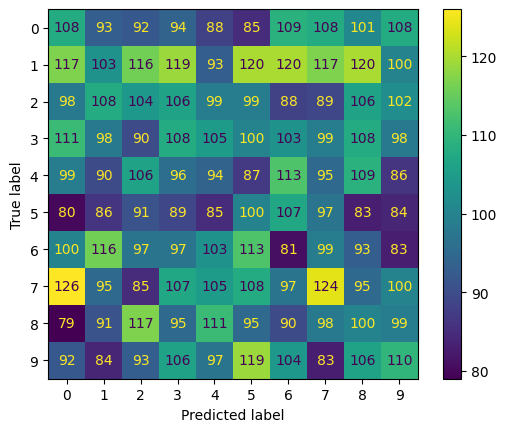

In [23]:
# Pior classificador possível

rand = np.random.choice(y.cat.categories, size = len(y_test)) # Classificador aleatório (baseline)

labels = y.cat.categories
cm = confusion_matrix(y_test, rand, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

[[ 881    0    2    2    0    3   22    1   54   21]
 [   2 1063    3    4    1    1   21    1   24    5]
 [  90   28  316   53    3    1  240    4  249   15]
 [  48   46   14  348    2    4   54   11  388  105]
 [  24    9    6    5  129    9   82    7  231  473]
 [  86   25    4   24    4   52   41    1  568   97]
 [  20   25    5    0    2    7  901    0   21    1]
 [   6   11    0    5    8    2    4  326   47  633]
 [  10  137    2   13    3    7   13    1  622  167]
 [   5   10    5    4    7    1    1   16   15  930]]


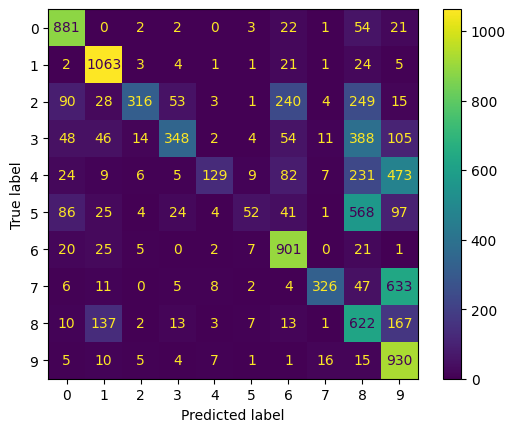

In [24]:
# Gauss

labels = y.cat.categories
cm = confusion_matrix(y_test, gauss_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

[[ 878    0    3    8    1   54   15    0   27    0]
 [   0 1072   16    3    0   11    5    1   16    1]
 [  19   15  805   25   29    2   39   14   49    2]
 [   7   19   47  829    2   19    6   19   46   26]
 [   3   10    7    0  777    5   12    5   14  142]
 [  19   12   10  136   24  633   16    5   19   28]
 [  21   35   13    0   12   33  864    0    4    0]
 [   7   20   13    4   37    0    0  873   29   59]
 [  12   39   23   69    8   29    3    3  740   49]
 [  12   20    5   13   88    1    2   34   33  786]]


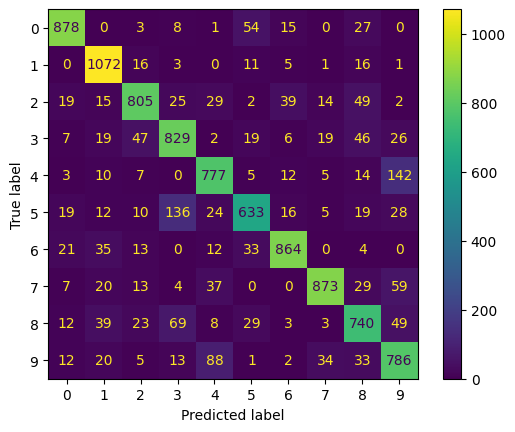

In [25]:
# Bernoulli

labels = y.cat.categories
cm = confusion_matrix(y_test, bernoulli_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

Ao analisar a matriz de confusão, em que a diagonal apresenta os acertos e as demais células apresentam os erros, podemos perceber que o classificador Bernoulli apresenta uma menor quantidade de acertos em relação ao Gaussiano, o que já era esperado, uma vez que a distribuição de Bernoulli se encaixa melhor com os dados. Apesar disso, ambos performaram melhor que o classificador de pior caso - o aleatório, que apresenta uma acurácia de 0.1, enquanto o Gaussiano apresenta uma acurácia de 0.55 e o Bernoulli de 0.83, sendo respectivamente 5x e 8x mais assertivos que o classificador de pior caso. Além disso, o classificador baseado em Bernoulli é o que possui menor preço computacional, sendo este o mais indicado para o problema em questão.

Podemos perceber a taxa de erro para cada dígito em cada modelo, em que Bernoulli erra bastante o dígito 5 com o 4 e o 8 com o 3, o que faz sentido diante da proximidade visual desses dígitos; enquanto o Gaussiano erra bastante os dígitos 2,3,4,5,7 e 8, com maior ênfase no dígito 5, isso mostra que esse modelo não é muito ideal conforme descrito na seção anterior. 

Portanto, diante da natureza de nosso problema, o classificador de Bernoulli é o mais indicado, uma vez que apresenta uma maior acurácia e menor preço computacional, com eficientes resultados. Já o classificador Gaussiano, em nosso problema, pode ser considerado um modelo "ruim" em comparação ao Bernoulli.

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

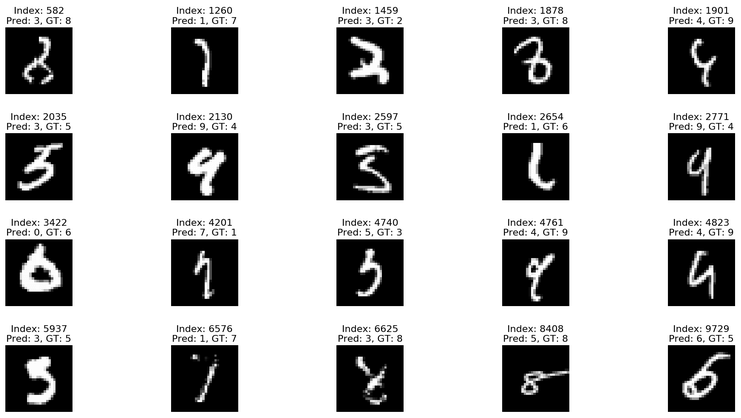

--- Respostas ---

Como foi citado anteriormente, as duas hipóteses que podem ser aprimoradas são: a independência entre as variáveis aleatórias do problema e a distribuição dos atributos, principalmente no caso do modelo Gaussiano. Nesse contexto, provamos que o modelo de Bernoulli se encaixa melhor com os dados, porém sua hipótese de independência entre as variáveis aleatórias também não é condizente com a natureza do problema, uma vez que a classificação dos algarismos é definida a partir da composição entre os pixels que seguem a característica visual de um desses símbolos.

Portanto, para aprimorar o modelo, poderíamos utilizar o classificador de Bernoulli, porém sem assumir a hipótese de independência entre as variáveis aleatórias, o que pode ser feito por meio de uma análise de correlação entre os pixels, de modo que encontrando uma relação entre eles possamos, assim, melhorar a assertividade do modelo, mas isso é bastante complexo.

Como não possuimos esse modelo, podemos usar um classificador mais "forte". Nesse caso usaremos o MLP, que é uma rede neural baseada em Backpropagation que não possui noção de independência entre as variáveis aleatórias (não ingênua). Contudo, o MLP possui um custo computacional muito alto, o que pode ser inviável para problemas maiores, apesar de sua acurácia ser muito boa (cerca de 98%).

Os resultados encontrados pelo MLP estão demonstrados abaixo: 

In [30]:
# MLP - Backpropagation (Multilayer Perceptron)

mlp = MLPClassifier(hidden_layer_sizes=(100, 100))
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

print('Acurácia:', mlp.score(X_test, y_test))
print('Quantidade de acertos:', np.sum(mlp_pred == y_test))
print('Quantidade de erros:', np.sum(mlp_pred != y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Acurácia: 0.9753
Quantidade de acertos: 9753
Quantidade de erros: 247


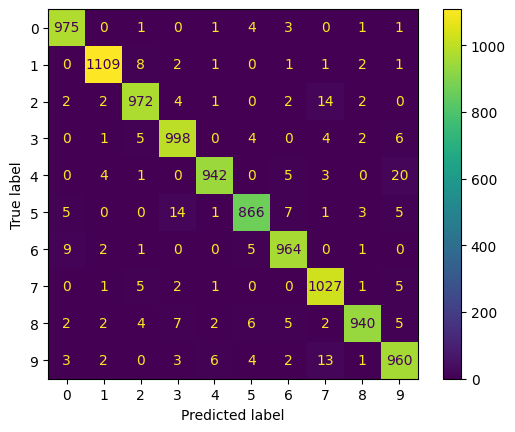

In [31]:
labels = y.cat.categories
cm = confusion_matrix(y_test, mlp_pred, labels=labels)

disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()